# <center>Country & Region Similarity - ML Clustering</center>

<hr style="border: none; border-top: 1px solid #000;">

<center>
    <span>
        Created by <b>Ian Yap</b>
        &emsp;|&emsp;
        Data from <a href="https://www.cia.gov/the-world-factbook/"><b>cia.gov</b></a>
        &nbsp;
    </span>
</center>

<center>
    <span>
        <a href="https://www.linkedin.com/in/ian-yap-052870139/"><b>LinkedIn</b></a>
        &emsp;|&emsp;
        <a href="https://linktr.ee/ianyap"><b>Portfolio</b></a>
    </span>
</center>
    
<hr style="border: none; border-top: 1px solid #000;">


## Table of Contents

1. [Background](#Background)
2. [Objectives](#Objectives)
3. [Feature Information](#Feature_Information)
4. [Import Libraries](#Import_Libraries)
5. [Data Loading](#Data_Loading)
6. [Feature Engineering](#Feature_Engineering)
7. [Exploratory Data Analysis (EDA) & Visualization](#Exploratory_Data_Analysis_(EDA)_&_Visualization)
    - [Feature Data Analysis](#Feature_Data_Analysis)
    - [Data Correlation](#Data_Correlation)
8. [Data Preparation](#Data_Preparation)
    - [Missing Data](#Missing_Data)
    - [Climate](#Climate)
    - [Literacy (%)](#Literacy_(%))
    - [Industry, Service & Agriculture](#Industry,_Service_&_Agriculture)
    - [Feature Preparation](#Feature_Preparation)
9. [Model Development](#Model_Development)
    - [K-Means Clustering](#K-Means_Clustering)
10. [Geographical Model](#Geographical_Model)

## <a id='Background' href=#1> Background </a>

The World Factbook, compiled by the Central Intelligence Agency (CIA), is a comprehensive resource containing information on various aspects of each country. This clustering project is initiated with the aim of gaining deeper understanding of the diverse countries around the globe.

In this project, we will perform clustering analysis on the world factbook using the dataset containing a variety of information including geography, population, economy, government, and more. Based on this dataset, a clustering analysis will be done to uncover hidden patterns and structures within the global data landscape.

Besides that, the insights obtained from the clustering results can also be used to derive actionable insights such as identifying groups of countries with similar economic profiles, cultural attributes or developmental challenges which can help policymakers, researchers and global stakeholders to make informed decisions.

## <a id='Objectives' href=#1> Objectives </a>

The *main* objective of this project is to **categorize countries into meaningful clusters based on similarities in key indicators and attributes.**

The *secondary* objective of this project is to **identify patterns or structures within the World Factbook data** to facilitate in more informed decision-making.

## <a id='Feature_Information' href=#1> Feature Information </a>

- **Country**: Unique identifier
- **Region**: Geographical region where the country belongs
- **Population**: Total number of people living in the country
- **Area (sq. mi.)**: Total land area of the country in square miles
- **Pop. Density (per sq. mi.)**: Number of people per square mile of land area
- **Coastline (coast/area ratio)**: Ratio of the length of the country's coastline to its total land area
- **Net migration**: Difference between number of immigrants and emigrants per 1,000 people
- **Infant mortality (per 1000 births)**: Number of infant deaths before reaching 1 year old per 1,000 births in a given year
- **GDP (\\$ per capita)**: Total economic output of the country divided by its population
- **Literacy (%)**: Percentage of the population aged 15 and over that can read and write
- **Phones (per 1000)**: Number of phones per 1,000 people
- **Arable (%)**: The percentage of land suitable for growing crops
- **Crops (%)**: The percentage of arable land used for growing crops
- **Other (%)**: The percentage of arable land used for purposes other than growing crops
- **Climate**: Predominant climate of country in numeric form
- **Birthrate**: Number of births per 1,000 people in a given year
- **Deathrate**: Number of deaths per 1,000 people in a given year
- **Agriculture**: Contribution of agriculture sector to GDP (%/100)
- **Industry**: Contribution of industry sector to GDP (%/100)
- **Service**: Contribution of service sector to GDP (%/100)

## <a id='Import_Libraries' href=#1> Import Libraries </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## <a id='Data_Loading' href=#1> Data Loading </a>

Loading the dataset to be used for analysis and model development.

In [2]:
df_ori = pd.read_csv('CIA_Country_Facts.csv')
df = df_ori.copy()

In [3]:
df.head()

Country                               Region  Population  \
0     Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1         Albania  EASTERN EUROPE                          3581655   
2         Algeria  NORTHERN AFRICA                        32930091   
3  American Samoa  OCEANIA                                   57794   
4         Andorra  WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  \
0          36.0                3.2       12.13       0.22      87.65      1.0   
1          86.5               71.2       21.09       4.42      74.49      3.0   
2          70.0               78.1        3.22       0.25      96.53      1.0   
3          97.0              259.5       10.00      15.00      75.00      2.0   
4         100.0              497.2        2.22       0.00      97.78      3.0   

   Birthrate  Deathrate  Agriculture  Industry  Service  
0      46.60      20.34        0.380     0.240    0.380  
1      15.11       5.22        0.232     0.188    0.579  
2      17.14       4.61        0.101     0.600    0.298  
3      22.46       3.27          NaN       NaN      NaN  
4       8.71       6.25          NaN       NaN      NaN

In [4]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

## <a id='Feature_Engineering' href=#1> Feature Engineering </a>

Data wrangling is performed to clean the dataset so that it is suitable for the predictive model.

We check for any duplicated data and remove them as each country should only be represented once.

In [5]:
print(f'Number of duplicated rows: {df.duplicated().sum()}')
# df.drop_duplicates(inplace = True)
# print(f'Number of duplicated rows: {df.duplicated().sum()}')

Number of duplicated rows: 0


Next, we will check the shape of the dataset and its status.

Looks like our dataset has 227 rows, 20 columns, some missing data and the data types of each attributes are correct.

We will deal with the missing data before performing cluster analysis.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

We explore the dataset using descriptive statistics to gain insights on the data.

In [7]:
num_col = df.select_dtypes(include = 'number').describe()
num_col.transpose()

count          mean           std  \
Population                          227.0  2.874028e+07  1.178913e+08   
Area (sq. mi.)                      227.0  5.982270e+05  1.790282e+06   
Pop. Density (per sq. mi.)          227.0  3.790471e+02  1.660186e+03   
Coastline (coast/area ratio)        227.0  2.116533e+01  7.228686e+01   
Net migration                       224.0  3.812500e-02  4.889269e+00   
Infant mortality (per 1000 births)  224.0  3.550696e+01  3.538990e+01   
GDP ($ per capita)                  226.0  9.689823e+03  1.004914e+04   
Literacy (%)                        209.0  8.283828e+01  1.972217e+01   
Phones (per 1000)                   223.0  2.360614e+02  2.279918e+02   
Arable (%)                          225.0  1.379711e+01  1.304040e+01   
Crops (%)                           225.0  4.564222e+00  8.361470e+00   
Other (%)                           225.0  8.163831e+01  1.614083e+01   
Climate                             205.0  2.139024e+00  6.993968e-01   
Birthrate                           224.0  2.211473e+01  1.117672e+01   
Deathrate                           223.0  9.241345e+00  4.990026e+00   
Agriculture                         212.0  1.508443e-01  1.467980e-01   
Industry                            211.0  2.827109e-01  1.382722e-01   
Service                             212.0  5.652830e-01  1.658410e-01   

                                         min           25%          50%  \
Population                          7026.000  437624.00000  4786994.000   
Area (sq. mi.)                         2.000    4647.50000    86600.000   
Pop. Density (per sq. mi.)             0.000      29.15000       78.800   
Coastline (coast/area ratio)           0.000       0.10000        0.730   
Net migration                        -20.990      -0.92750        0.000   
Infant mortality (per 1000 births)     2.290       8.15000       21.000   
GDP ($ per capita)                   500.000    1900.00000     5550.000   
Literacy (%)                          17.600      70.60000       92.500   
Phones (per 1000)                      0.200      37.80000      176.200   
Arable (%)                             0.000       3.22000       10.420   
Crops (%)                              0.000       0.19000        1.030   
Other (%)                             33.330      71.65000       85.700   
Climate                                1.000       2.00000        2.000   
Birthrate                              7.290      12.67250       18.790   
Deathrate                              2.290       5.91000        7.840   
Agriculture                            0.000       0.03775        0.099   
Industry                               0.020       0.19300        0.272   
Service                                0.062       0.42925        0.571   

                                             75%           max  
Population                          1.749777e+07  1.313974e+09  
Area (sq. mi.)                      4.418110e+05  1.707520e+07  
Pop. Density (per sq. mi.)          1.901500e+02  1.627150e+04  
Coastline (coast/area ratio)        1.034500e+01  8.706600e+02  
Net migration                       9.975000e-01  2.306000e+01  
Infant mortality (per 1000 births)  5.570500e+01  1.911900e+02  
GDP ($ per capita)                  1.570000e+04  5.510000e+04  
Literacy (%)                        9.800000e+01  1.000000e+02  
Phones (per 1000)                   3.896500e+02  1.035600e+03  
Arable (%)                          2.000000e+01  6.211000e+01  
Crops (%)                           4.440000e+00  5.068000e+01  
Other (%)                           9.544000e+01  1.000000e+02  
Climate                             3.000000e+00  4.000000e+00  
Birthrate                           2.982000e+01  5.073000e+01  
Deathrate                           1.060500e+01  2.974000e+01  
Agriculture                         2.210000e-01  7.690000e-01  
Industry                            3.410000e-01  9.060000e-01  
Service                             6.785000e-01  9.

In [8]:
cat_col = df.select_dtypes(include = 'object').describe()
cat_col.transpose()

count unique                                  top freq
Country   227    227                          Afghanistan    1
Region    227     11  SUB-SAHARAN AFRICA                    51

The unique identifier 'Booking_ID' is removed as it is not important for our analysis.

In [9]:
for col in cat_col:
    print(f'Unique values in column {col}: \
    \n{df[col].unique()} \
    \n')

Unique values in column Country:     
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua & Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia & Herzegovina' 'Botswana' 'Brazil' 'British Virgin Is.' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Rep.' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Repub. of the' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Guiana'
 'French Polynesia' 'Gabon' 'Gambia, The' 'Gaza Strip' 'Georgia' 'Germany'
 'Ghana' 'Gi

Removing whitespaces around the values of 'Region':

In [10]:
df['Region'] = df['Region'].str.strip()

## <a id='Exploratory_Data_Analysis_(EDA)_&_Visualization' href=#1> Exploratory Data Analysis (EDA) & Visualization </a>

We explore and gain insights on the data through visualization.

### <a id='Feature_Data_Analysis' href=#1> Feature Data Analysis </a>

Let's take a look at the population of countries:

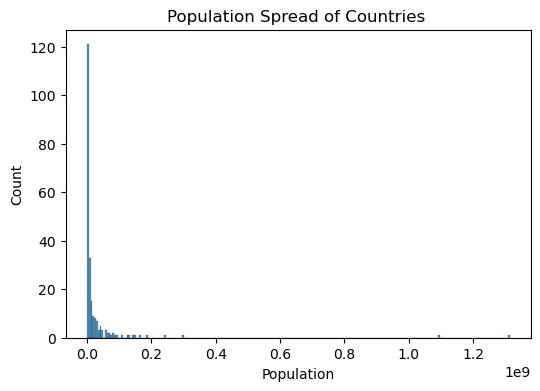

In [11]:
plt.figure(figsize = (6, 4))

sns.histplot(data = df, x = 'Population')
plt.title('Population Spread of Countries ')
plt.show()

In [12]:
df[df['Population'] > 400000000]

Country                Region  Population  Area (sq. mi.)  \
42   China  ASIA (EX. NEAR EAST)  1313973713         9596960   
94   India  ASIA (EX. NEAR EAST)  1095351995         3287590   

    Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
42                       136.9                          0.15          -0.40   
94                       333.2                          0.21          -0.07   

    Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
42                               24.18              5000.0          90.9   
94                               56.29              2900.0          59.5   

    Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
42              266.7        15.4       1.25      83.35      1.5      13.25   
94               45.4        54.4       2.74      42.86      2.5      22.01   

    Deathrate  Agriculture  Industry  Service  
42       6.97        0.125     0.473    0.403  
94       8.18        0.186     0.276    0.538

The histogram is skewed due to China and India having large populations. Let's exclude them:

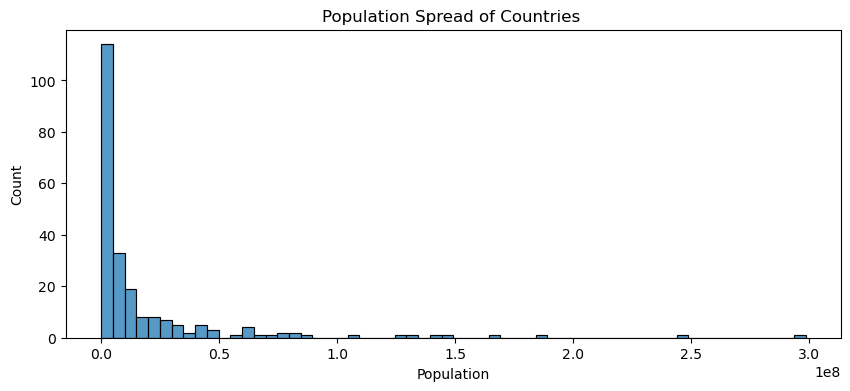

In [13]:
plt.figure(figsize = (10, 4))

sns.histplot(data = df[df['Population'] < 400000000], x = 'Population', bins = 60)
plt.title('Population Spread of Countries ')
plt.show()

Majority of countries have population **below 5,000,000.**

Let's look at the GDP of different regions:

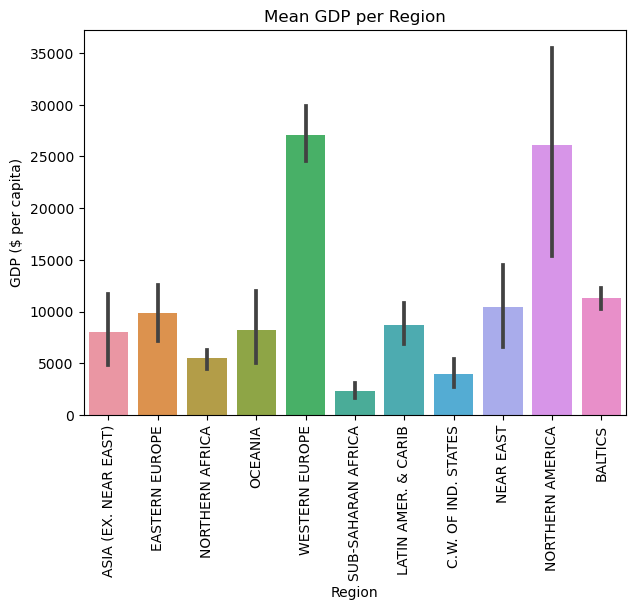

In [14]:
plt.figure(figsize = (7,5))

sns.barplot(data = df, y = 'GDP ($ per capita)', x = 'Region', estimator = np.mean)
plt.title('Mean GDP per Region')
plt.xticks(rotation = 90)
plt.show();

Looks like **Western Europe has the highest mean GDP.**

Northern America has the 2nd highest mean GDP. However, the confidence interval of the mean GDP is the widest. This shows a **huge disparity between the GDP per capita for the countries in Northern America.**

Let's look into the relationships of various aspects of a country against their GDP, primarily:
1. Total Land Area
2. Number of Phones
3. Literacy Rate

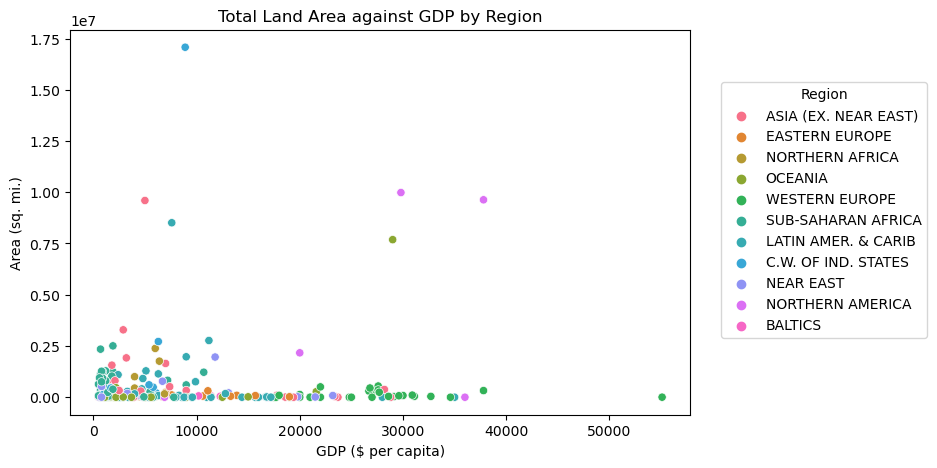

In [15]:
plt.figure(figsize = (8, 5))

sns.scatterplot(data = df, x = 'GDP ($ per capita)', y = 'Area (sq. mi.)', hue = 'Region')
plt.title('Total Land Area against GDP by Region')
plt.legend(title = 'Region', loc = (1.05, 0.2))
plt.show();

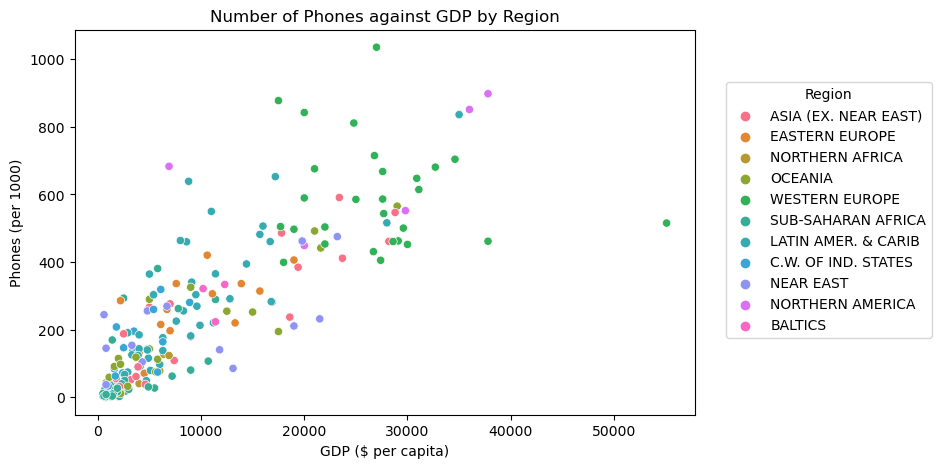

In [16]:
plt.figure(figsize = (8, 5))

sns.scatterplot(data = df, x = 'GDP ($ per capita)', y = 'Phones (per 1000)', hue = 'Region')
plt.title('Number of Phones against GDP by Region')
plt.legend(title = 'Region', loc = (1.05, 0.2))
plt.show();

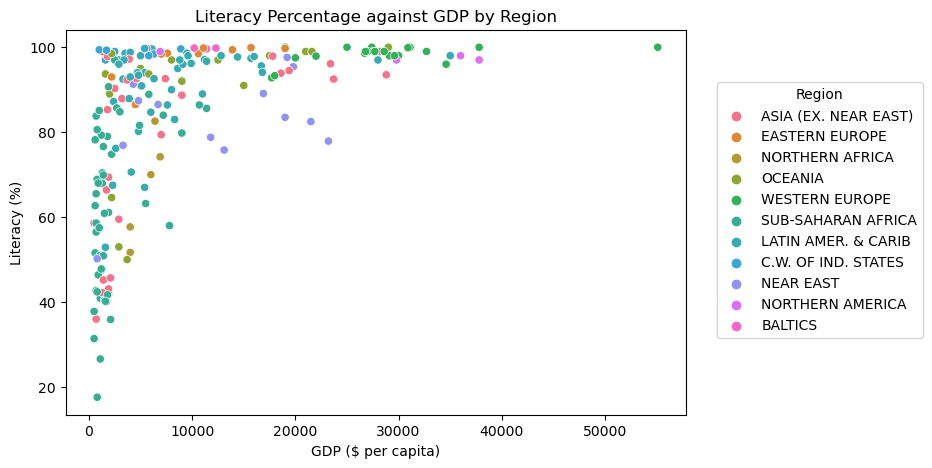

In [17]:
plt.figure(figsize = (8, 5))

sns.scatterplot(data = df, x = 'GDP ($ per capita)', y = 'Literacy (%)', hue = 'Region')
plt.title('Literacy Percentage against GDP by Region')
plt.legend(title = 'Region', loc = (1.05, 0.2))
plt.show();

Based on the scatter plots:
1. There is **no clear relation between the total land area of a country against their GDP.** The GDP of countries below 1,000,000 square miles which is the majority are spread out evenly.
2. As the **GDP per capita of a country increase, the number of phones per 1,000 people increases linearly.** This could be due to people living in higher GDP countries being able to afford more than 1 phone. Due to business being larger in higher GDP countries, employees also require extra phones for business purposes.
3. As the **GDP per capita of a country increase, it is less likely that the literacy rate of its population aged 15 and above to be below 90%**. As the literacy rate of a country increase, more of the population is able to produce high level contribution to the country, which increases the country GDP.

### <a id='Data_Correlation' href=#1> Data Correlation </a>

In this section, we will look at the correlation between the features.

In [18]:
df.head()

Country                Region  Population  Area (sq. mi.)  \
0     Afghanistan  ASIA (EX. NEAR EAST)    31056997          647500   
1         Albania        EASTERN EUROPE     3581655           28748   
2         Algeria       NORTHERN AFRICA    32930091         2381740   
3  American Samoa               OCEANIA       57794             199   
4         Andorra        WESTERN EUROPE       71201             468   

   Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
0                        48.0                          0.00          23.06   
1                       124.6                          1.26          -4.93   
2                        13.8                          0.04          -0.39   
3                       290.4                         58.29         -20.71   
4                       152.1                          0.00           6.60   

   Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
0                              163.07               700.0          36.0   
1                               21.52              4500.0          86.5   
2                               31.00              6000.0          70.0   
3                                9.27              8000.0          97.0   
4                                4.05             19000.0         100.0   

   Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
0                3.2       12.13       0.22      87.65      1.0      46.60   
1               71.2       21.09       4.42      74.49      3.0      15.11   
2               78.1        3.22       0.25      96.53      1.0      17.14   
3              259.5       10.00      15.00      75.00      2.0      22.46   
4              497.2        2.22       0.00      97.78      3.0       8.71   

   Deathrate  Agriculture  Industry  Service  
0      20.34        0.380     0.240    0.380  
1       5.22        0.232     0.188    0.579  
2       4.61        0.101     0.600    0.298  
3       3.27          NaN       NaN      NaN  
4       6.25          NaN       NaN      NaN

Convert regions into dummy variables to find correlation:

In [19]:
# Get dummies for categorical features
df_dummy = pd.get_dummies(df.drop('Country', axis = 1))
df_dummy.head()

Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
0    31056997          647500                        48.0   
1     3581655           28748                       124.6   
2    32930091         2381740                        13.8   
3       57794             199                       290.4   
4       71201             468                       152.1   

   Coastline (coast/area ratio)  Net migration  \
0                          0.00          23.06   
1                          1.26          -4.93   
2                          0.04          -0.39   
3                         58.29         -20.71   
4                          0.00           6.60   

   Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
0                              163.07               700.0          36.0   
1                               21.52              4500.0          86.5   
2                               31.00              6000.0          70.0   
3                                9.27              8000.0          97.0   
4                                4.05             19000.0         100.0   

   Phones (per 1000)  Arable (%)  ...  Region_BALTICS  \
0                3.2       12.13  ...               0   
1               71.2       21.09  ...               0   
2               78.1        3.22  ...               0   
3              259.5       10.00  ...               0   
4              497.2        2.22  ...               0   

   Region_C.W. OF IND. STATES  Region_EASTERN EUROPE  \
0                           0                      0   
1                           0                      1   
2                           0                      0   
3                           0                      0   
4                           0                      0   

   Region_LATIN AMER. & CARIB  Region_NEAR EAST  Region_NORTHERN AFRICA  \
0                           0                 0                       0   
1                           0                 0                       0   
2                           0                 0                       1   
3                           0                 0                       0   
4                           0                 0                       0   

   Region_NORTHERN AMERICA  Region_OCEANIA  Region_SUB-SAHARAN AFRICA  \
0                        0               0                          0   
1                        0               0                          0   
2                        0               0                          0   
3                        0               1                          0   
4                        0               0                          0   

   Region_WESTERN EUROPE  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1  

[5 rows x 29 columns]

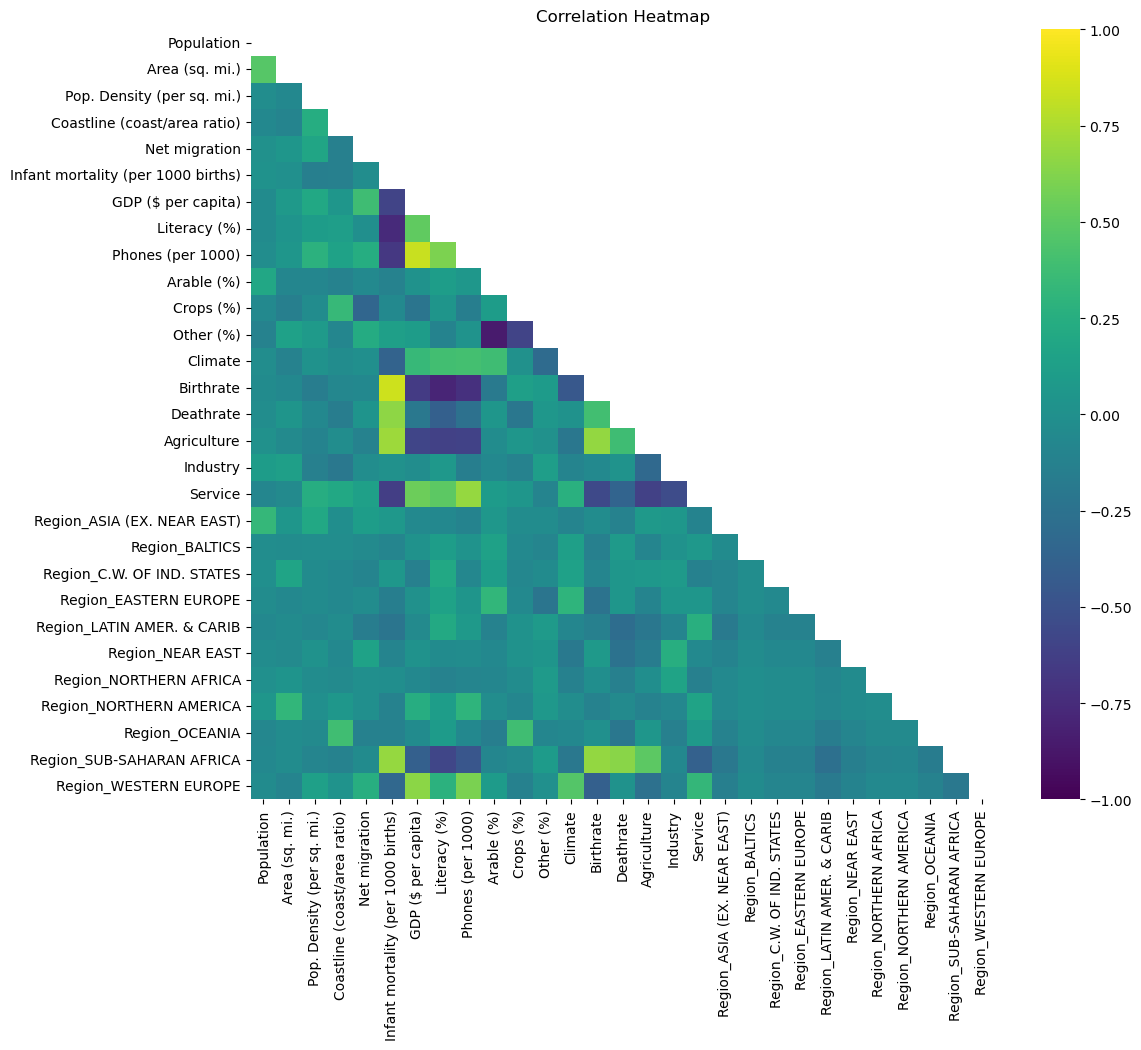

In [20]:
# Correlation between features
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df_dummy.corr())

plt.figure(figsize = (12, 10))
sns.heatmap(df_dummy.corr(), mask = matrix, cmap = 'viridis', vmin=-1, vmax=1)
plt.title('Correlation Heatmap');

Through the correlation heatmap, we can look at the correlation between different aspects of a country. For example, the birthrate is positively correlated to the infant mortality rate, while being negatively correlated to the literacy rate. This means that a higher birthrate contributes to higher infant mortality rate, and a country with lower literacy rate will have a high birthrate.

We can plot the cluster map to look at the groupings of the features based on its correlation with each other.

<Figure size 1200x1000 with 0 Axes>

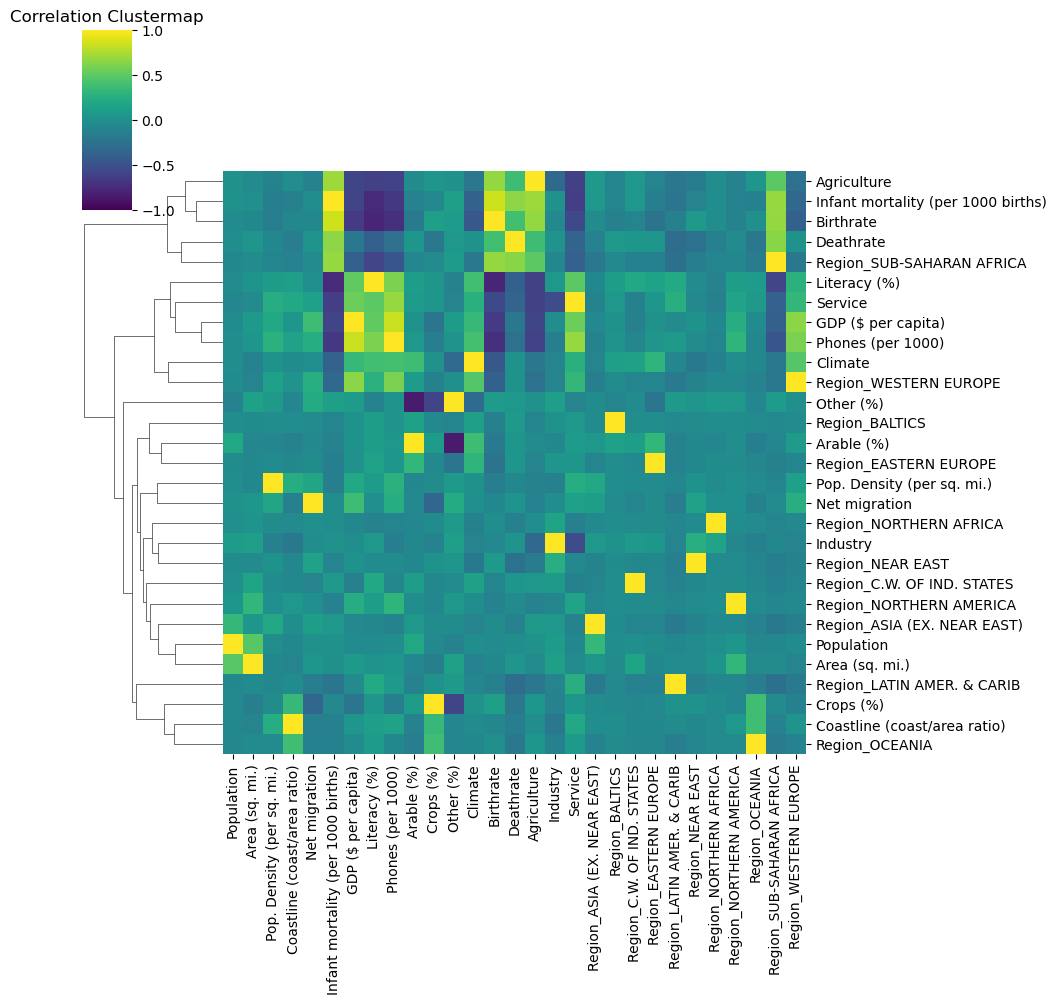

In [21]:
plt.figure(figsize = (12, 10))

sns.clustermap(df_dummy.corr(), cmap = 'viridis', vmin=-1, vmax=1, col_cluster = False)
plt.title('Correlation Clustermap');

## <a id='Data_Preparation' href=#1> Data Preparation </a>

In this section, we will prepare the data to be used for cluster analysis.

### <a id='Missing_Data' href=#1> Missing Data </a>:

First, we will deal with the missing data starting from the highest percentage:

In [22]:
missing_value = df.isna().sum()
missing_value_percentage = (missing_value / len(df)) * 100

pd.DataFrame({'Total Missing Value': missing_value, 'Missing Percentage': missing_value_percentage}).sort_values('Missing Percentage', ascending = False)

Total Missing Value  Missing Percentage
Climate                                              22            9.691630
Literacy (%)                                         18            7.929515
Industry                                             16            7.048458
Service                                              15            6.607930
Agriculture                                          15            6.607930
Deathrate                                             4            1.762115
Phones (per 1000)                                     4            1.762115
Infant mortality (per 1000 births)                    3            1.321586
Net migration                                         3            1.321586
Birthrate                                             3            1.321586
Arable (%)                                            2            0.881057
Crops (%)                                             2            0.881057
Other (%)                                             2            0.881057
GDP ($ per capita)                                    1            0.440529
Region                                                0            0.000000
Coastline (coast/area ratio)                          0            0.000000
Pop. Density (per sq. mi.)                            0            0.000000
Area (sq. mi.)                                        0            0.000000
Population                                            0            0.000000
Country                                               0            0.000000

### <a id='Climate' href=#1> Climate </a>:

We will fill the missing climate values using the mean values across countries within the same region from the filled rows.

In [23]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [24]:
df['Climate'].isna().sum()

0

### <a id='Literacy_(%)' href=#1> Literacy (%) </a>:

We will fill the missing literacy values using the mean values across countries within the same region from the filled rows.

In [25]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [26]:
df['Literacy (%)'].isna().sum()

0

### <a id='Industry,_Service_&_Agriculture' href=#1> Industry, Service & Agriculture </a>:

We look into these 3 features together as they have similar missing values:

In [27]:
df[df['Industry'].isnull()]

Country               Region  Population  Area (sq. mi.)  \
3          American Samoa              OCEANIA       57794             199   
4                 Andorra       WESTERN EUROPE       71201             468   
78              Gibraltar       WESTERN EUROPE       27928               7   
80              Greenland     NORTHERN AMERICA       56361         2166086   
83                   Guam              OCEANIA      171019             541   
134               Mayotte   SUB-SAHARAN AFRICA      201234             374   
138                Monaco       WESTERN EUROPE       32543               2   
140            Montserrat  LATIN AMER. & CARIB        9439             102   
144                 Nauru              OCEANIA       13287              21   
153    N. Mariana Islands              OCEANIA       82459             477   
171          Saint Helena   SUB-SAHARAN AFRICA        7502             413   
174  St Pierre & Miquelon     NORTHERN AMERICA        7026             242   
177            San Marino       WESTERN EUROPE       29251              61   
208     Turks & Caicos Is  LATIN AMER. & CARIB       21152             430   
221     Wallis and Futuna              OCEANIA       16025             274   
223        Western Sahara      NORTHERN AFRICA      273008          266000   

     Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
3                         290.4                         58.29         -20.71   
4                         152.1                          0.00           6.60   
78                       3989.7                        171.43           0.00   
80                          0.0                          2.04          -8.37   
83                        316.1                         23.20           0.00   
134                       538.1                         49.52           6.78   
138                     16271.5                        205.00           7.75   
140                        92.5                         39.22           0.00   
144                       632.7                        142.86           0.00   
153                       172.9                        310.69           9.61   
171                        18.2                         14.53           0.00   
174                        29.0                         49.59          -4.86   
177                       479.5                          0.00          10.98   
208                        49.2                         90.47          11.68   
221                        58.5                         47.08            NaN   
223                         1.0                          0.42            NaN   

     Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
3                                  9.27              8000.0     97.000000   
4                                  4.05             19000.0    100.000000   
78                                 5.13             17500.0     98.391304   
80                                15.82             20000.0     97.750000   
83                                 6.94             21000.0     99.000000   
134                               62.40              2600.0     62.510000   
138                                5.43             27000.0     99.000000   
140                                7.35              3400.0     97.000000   
144                                9.95              5000.0     88.835294   
153                                7.11             12500.0     97.000000   
171                               19.00              2500.0     97.000000   
174                                7.54              6900.0     99.000000   
177                                5.73             34600.0     96.000000   
208                               15.67              9600.0     98.000000   
221                                 NaN              3700.0     50.000000   
223                                 NaN                 NaN     67.240000   

     Phones (per 100

All of the countries in the table have missing values in all 3 features except Monaco.

Aside from Greenland and Western Sahara, most of these countries are tiny islands, whereby their land area and population are not sufficient to sustain a growing agriculture, industry and service sector which can contribute to their GDP.

Greenland is largely covered by ice, its climate is not conducive for agriculture and it has very low population density. Meanwhile, Western Sahara is its polar opposite in terms of climate whereby it is very harsh due to the majority of the country being a desert. These extreme climates minimizes the contribution of agriculture, industry and service sector to the country GDP.

Hence, we will replace all these missing values with 0.

In [28]:
# Replace missing 'Agriculture' values
df['Agriculture'] = df['Agriculture'].fillna(0)

In [29]:
# Replace missing 'Industry' values
df['Industry'] = df['Industry'].fillna(0)

In [30]:
# Replace missing 'Service' values
df['Service'] = df['Service'].fillna(0)

Check the missing values:

In [31]:
missing_value = df.isna().sum()
missing_value_percentage = (missing_value / len(df)) * 100

pd.DataFrame({'Total Missing Value': missing_value, 'Missing Percentage': missing_value_percentage}).sort_values('Missing Percentage', ascending = False)

Total Missing Value  Missing Percentage
Phones (per 1000)                                     4            1.762115
Deathrate                                             4            1.762115
Birthrate                                             3            1.321586
Net migration                                         3            1.321586
Infant mortality (per 1000 births)                    3            1.321586
Crops (%)                                             2            0.881057
Other (%)                                             2            0.881057
Arable (%)                                            2            0.881057
GDP ($ per capita)                                    1            0.440529
Industry                                              0            0.000000
Agriculture                                           0            0.000000
Climate                                               0            0.000000
Country                                               0            0.000000
Region                                                0            0.000000
Literacy (%)                                          0            0.000000
Coastline (coast/area ratio)                          0            0.000000
Pop. Density (per sq. mi.)                            0            0.000000
Area (sq. mi.)                                        0            0.000000
Population                                            0            0.000000
Service                                               0            0.000000

The remaining missing values only contribute a small percentage of our dataset. Therefore, we will drop these rows:

In [32]:
df = df.dropna(axis = 0)

### <a id='Feature_Preparation' href=#1> Feature Preparation </a>:

Now we prepare the clean data for clustering:

In [33]:
# Remove unique identifier 'Country'
X = df.drop('Country', axis = 1)

# Get dummy variable for 'Region'
X_dummy = pd.get_dummies(X)

In [34]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_dummy)

## <a id='Model_Development' href=#1> Model Development </a>

We will use K-Means Clustering to cluster the World Factbook.

### <a id='K-Means_Clustering' href=#1> K-Means Clustering </a>

In [35]:
from sklearn.cluster import KMeans

ssd = []
for k in range(2, 30):
    model = KMeans(n_clusters = k, random_state = 101)
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

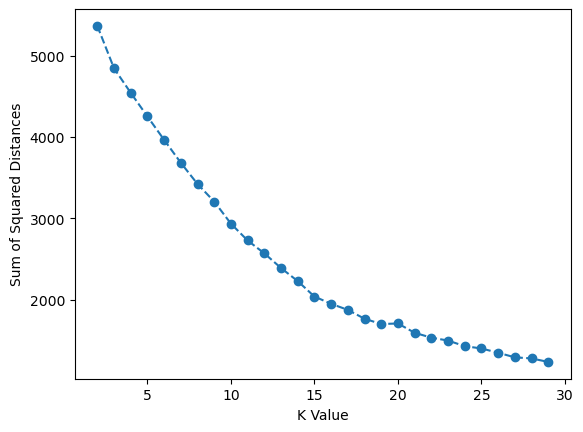

In [36]:
plt.plot(range(2, 30), ssd, 'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")

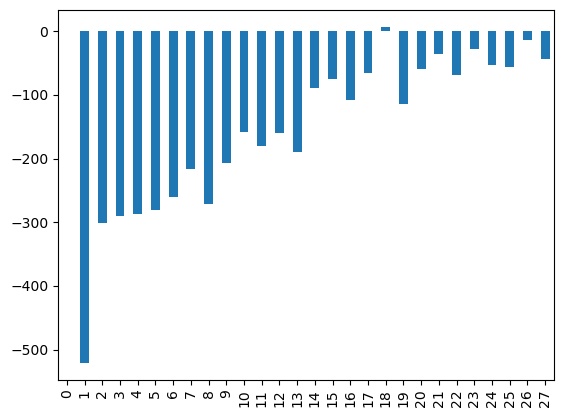

In [37]:
pd.Series(ssd).diff().plot(kind = 'bar');

There is a significant drop in sum of squared difference between 3 to 4 clusters compared to 2 to 3. The sum of squared differences does not change much with additional clusters after 4 clusters. Hence, k = 3 is chosen for the model.

We recreate the new model using the k value chosen:

In [38]:
model = KMeans(n_clusters = 3)
model.fit(scaled_X)

KMeans(n_clusters=3)

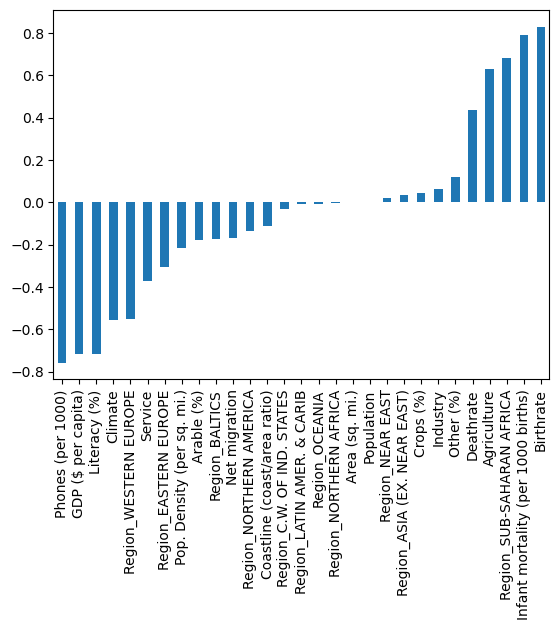

In [39]:
X_dummy['K = 3 Clusters'] = model.labels_
X_dummy.corr()['K = 3 Clusters'].sort_values()[:-1].plot(kind = 'bar');

The correlation bar graph shows the feature importance to the cluster classified by the model.

In [40]:
df['Cluster'] = model.labels_

In [41]:
df.head()

Country                Region  Population  Area (sq. mi.)  \
0     Afghanistan  ASIA (EX. NEAR EAST)    31056997          647500   
1         Albania        EASTERN EUROPE     3581655           28748   
2         Algeria       NORTHERN AFRICA    32930091         2381740   
3  American Samoa               OCEANIA       57794             199   
4         Andorra        WESTERN EUROPE       71201             468   

   Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
0                        48.0                          0.00          23.06   
1                       124.6                          1.26          -4.93   
2                        13.8                          0.04          -0.39   
3                       290.4                         58.29         -20.71   
4                       152.1                          0.00           6.60   

   Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  ...  \
0                              163.07               700.0          36.0  ...   
1                               21.52              4500.0          86.5  ...   
2                               31.00              6000.0          70.0  ...   
3                                9.27              8000.0          97.0  ...   
4                                4.05             19000.0         100.0  ...   

   Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  Deathrate  \
0       12.13       0.22      87.65      1.0      46.60      20.34   
1       21.09       4.42      74.49      3.0      15.11       5.22   
2        3.22       0.25      96.53      1.0      17.14       4.61   
3       10.00      15.00      75.00      2.0      22.46       3.27   
4        2.22       0.00      97.78      3.0       8.71       6.25   

   Agriculture  Industry  Service  Cluster  
0        0.380     0.240    0.380        2  
1        0.232     0.188    0.579        1  
2        0.101     0.600    0.298        1  
3        0.000     0.000    0.000        1  
4        0.000     0.000    0.000        0  

[5 rows x 21 columns]

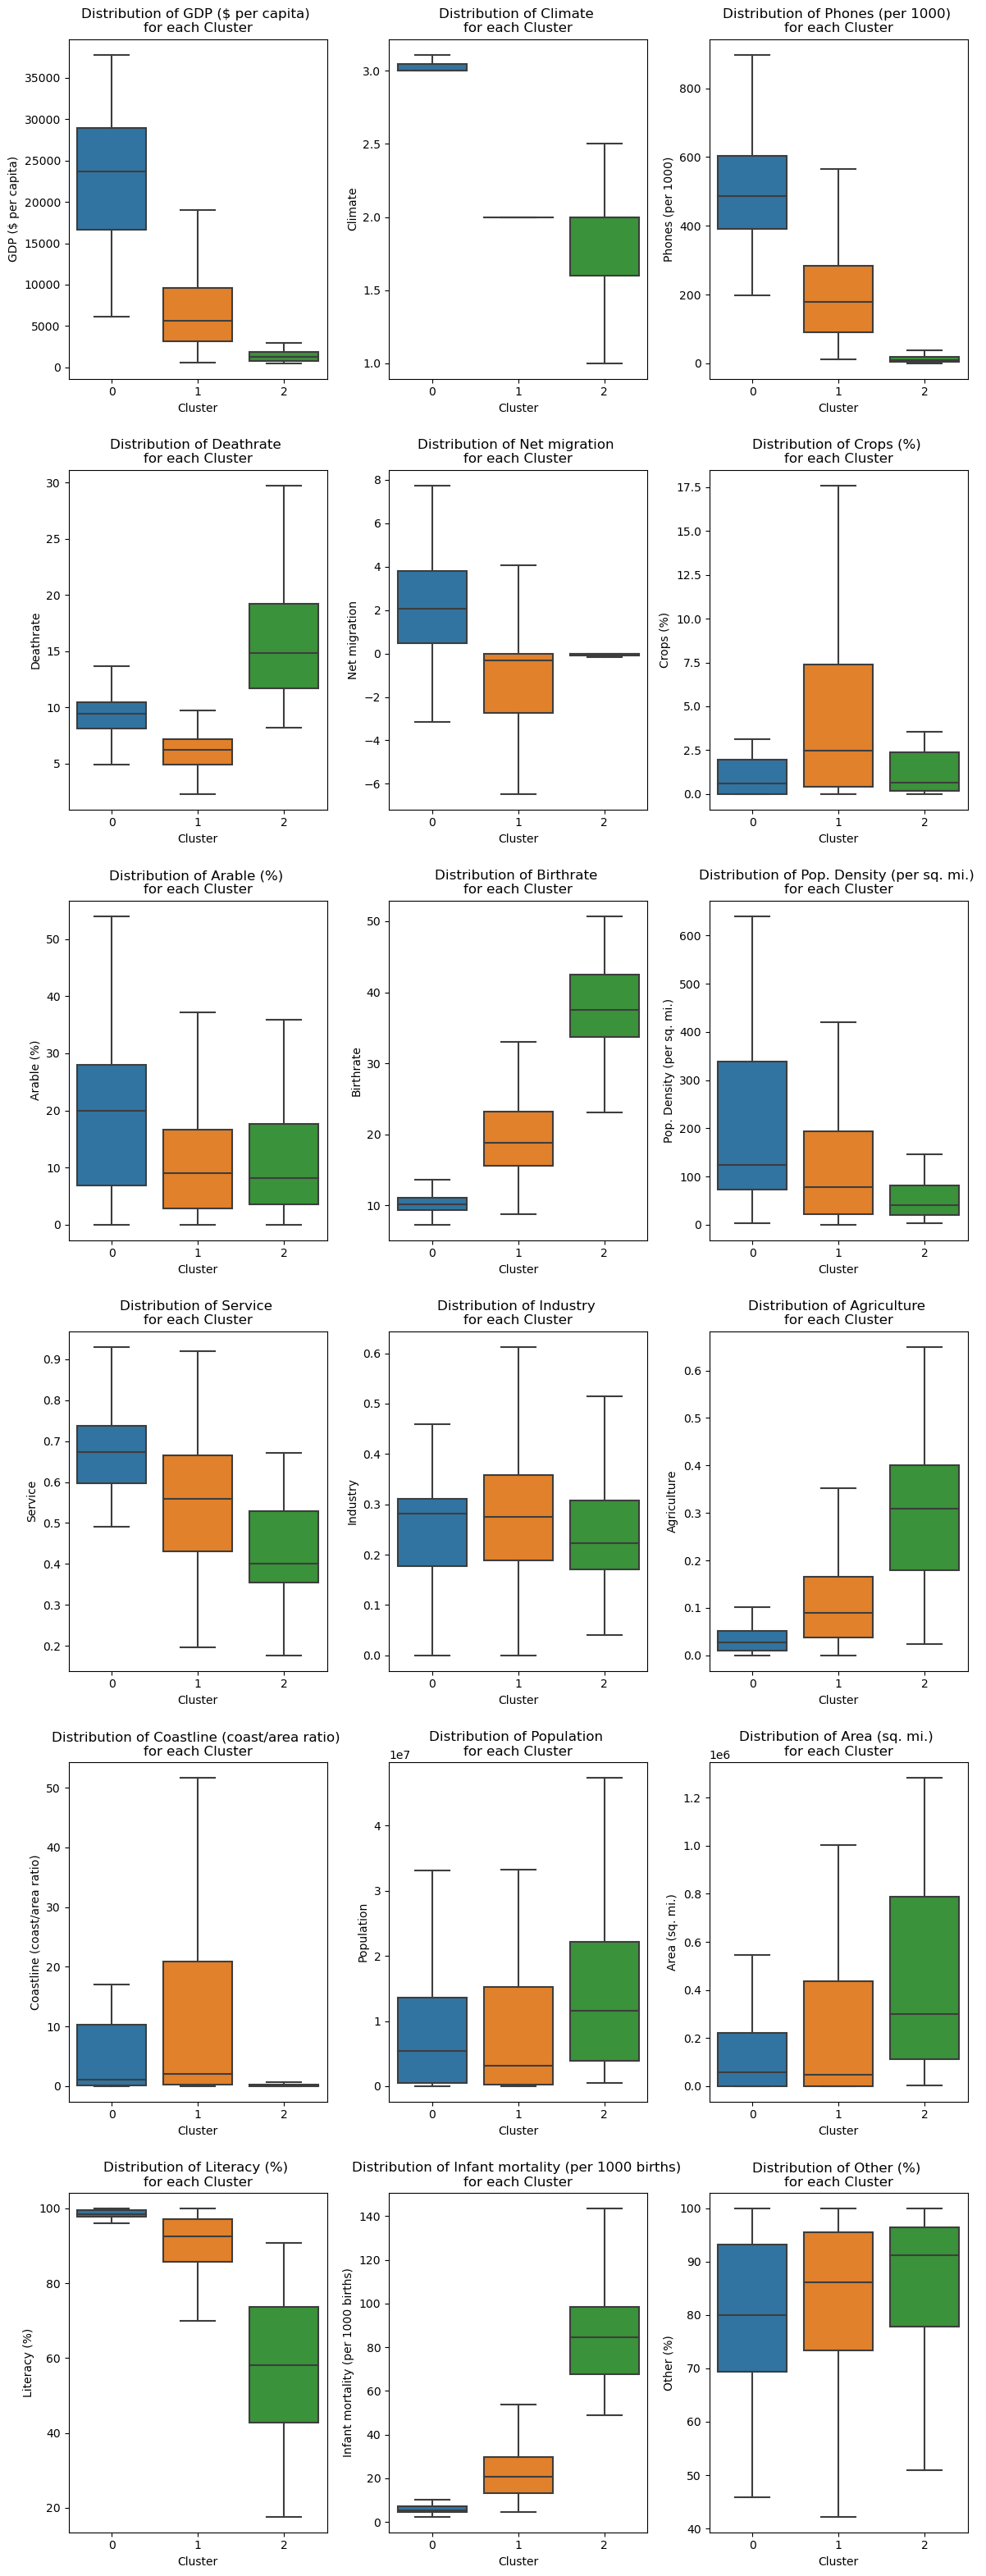

In [42]:
# Box plot to analyse clusters
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (12, 9*3.5))
row_col = [(0, 0), (0, 1), (0, 2),
           (1, 0), (1, 1), (1, 2),
           (2, 0), (2, 1), (2, 2), 
           (3, 0), (3, 1), (3, 2), 
           (4, 0), (4, 1), (4, 2), 
           (5, 0), (5, 1), (5, 2)]

feature_test = ['GDP ($ per capita)', 'Climate', 'Phones (per 1000)',
                'Deathrate', 'Net migration', 'Crops (%)',
                'Arable (%)', 'Birthrate', 'Pop. Density (per sq. mi.)',
                'Service','Industry', 'Agriculture',
                'Coastline (coast/area ratio)', 'Population', 'Area (sq. mi.)',
                'Literacy (%)', 'Infant mortality (per 1000 births)', 'Other (%)']
for i, feature_name in enumerate(feature_test):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.boxplot(data = df, x = 'Cluster', y = feature_name, ax = ax, showfliers = False)
    ax.set_title(f'Distribution of {feature_name} \nfor each Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(feature_name)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
    
# fig.delaxes(axes[6, 1])
plt.tight_layout()
plt.show()

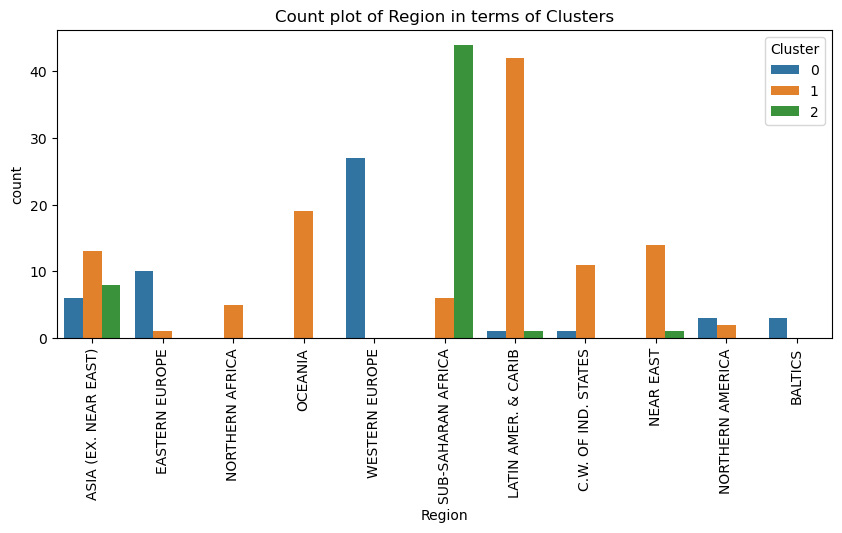

In [43]:
plt.figure(figsize = (10, 4))

sns.countplot(data = df, x = 'Region', hue = 'Cluster')
plt.title('Count plot of Region in terms of Clusters')
plt.xticks(rotation = 90)
plt.show()

From the box and count plots, we can see that the clustering model is able to separate the data into clusters based on the features. Some features have a clearer linear separation compared to others. This enables us to understand the countries that are closely related to each other and the similarities between them which separates them from the other clusters.

**Cluster 0 Country Features:**
- Mid GDP per capita
- Intermediate climate
- Moderate phones per 1,000 population
- Lowest deathrate
- Lowest migration
- Moderate birthrate
- Moderate agriculture
- Moderate literacy rate
- Moderate infant mortality per 1,000 births
- Countries from Northern Africa, Oceania, Latin America & Caribbean, Commonwealth of Independent States and Near East/Middle East

**Cluster 1 Country Features:**
- Lowest GDP per capita
- Harsher climate
- Least phones per 1,000 population
- Highest deathrate
- Mid net migration
- Highest birthrate
- Highest agriculture
- Lowest literacy rate
- Highest infant mortality per 1,000 births
- Countries from the Sub-Saharan Africa region

**Cluster 2 Country Features:**
- Highest GDP per capita
- Best climate
- Most phones per 1,000 population
- Moderate deathrate
- Highest net migration
- Lowest birthrate
- Least agriculture
- Highest literact rate
- Least infant mortality per 1,000 births
- Countries from Eastern Europe, Western Europe and the Baltics

We plot scatterplots to view the relationship between high importance features and GDP of each country which are clearly separated into 3 clusters.

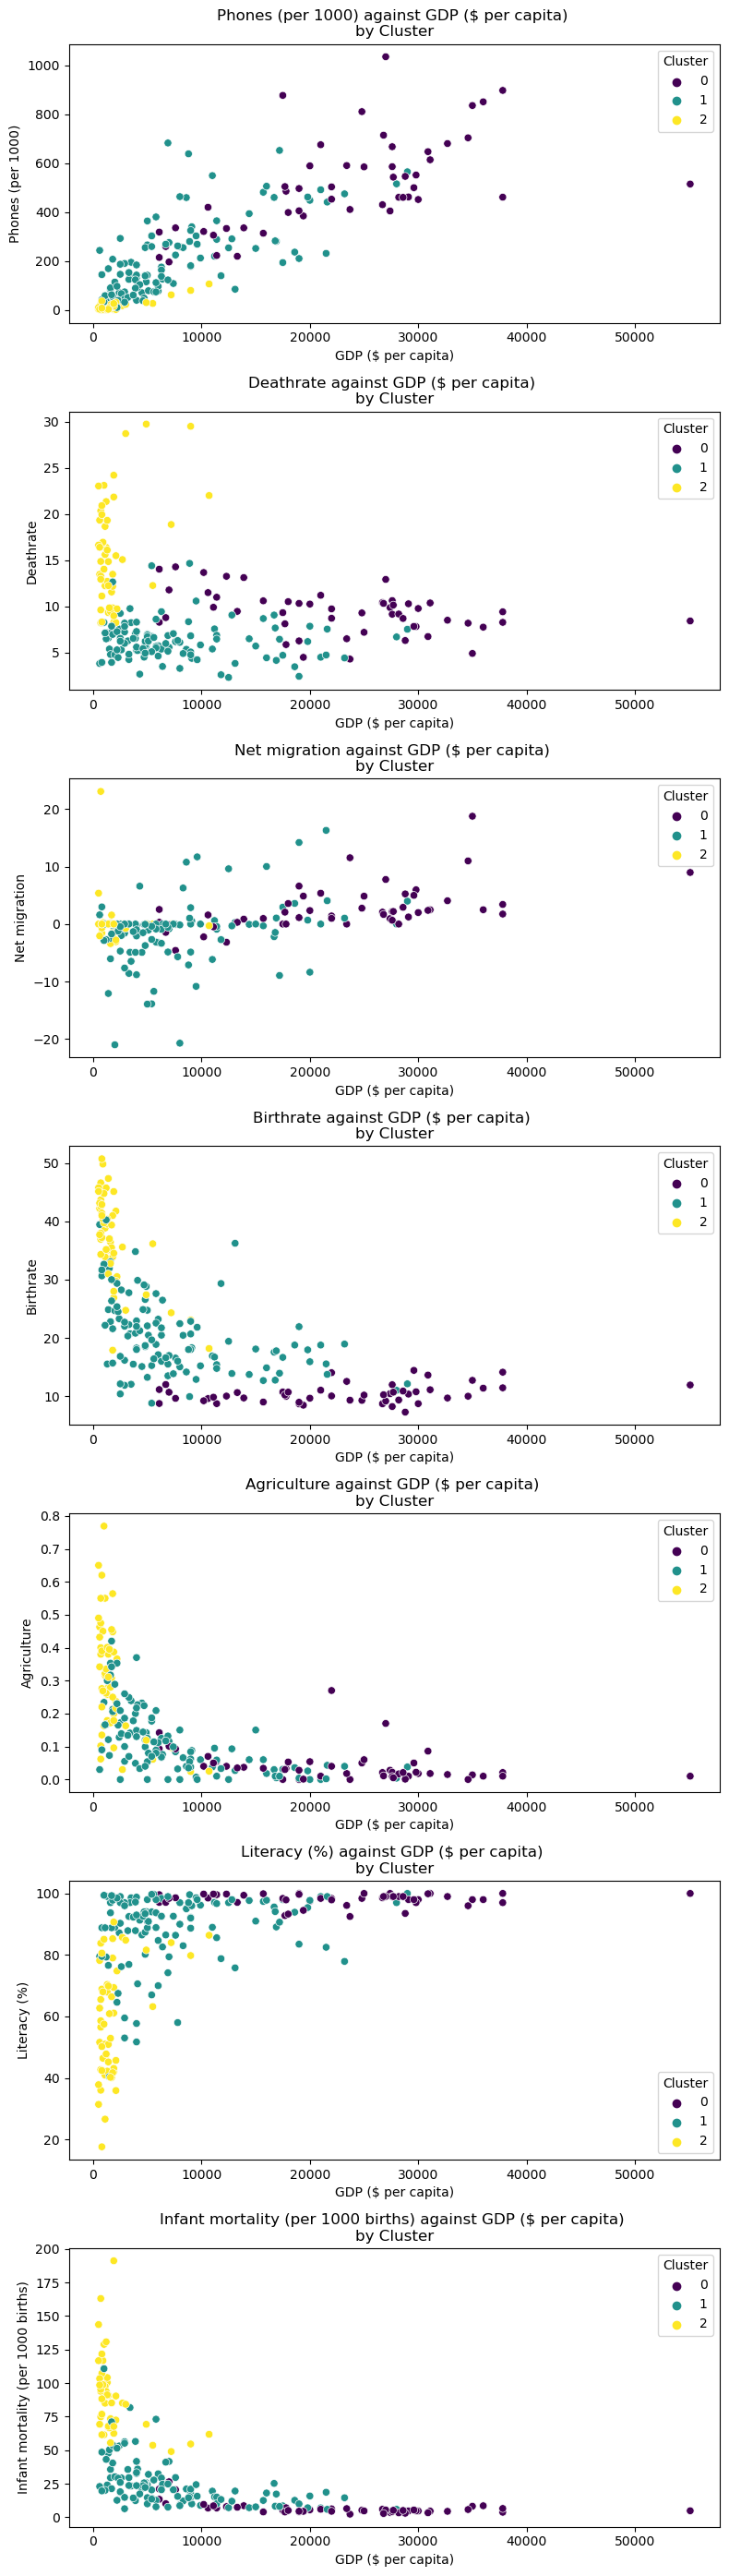

In [44]:
# Box plot to analyse clusters
fig, axes = plt.subplots(nrows = 7, ncols = 1, figsize = (8, 7*4))
row_col = [(0, 0),
           (1, 0),
           (2, 0), 
           (3, 0), 
           (4, 0),
           (5, 0),
           (6, 0)]

feature_test2 = ['Phones (per 1000)',
                'Deathrate',
                 'Net migration',
                 'Birthrate',
                 'Agriculture',
                 'Literacy (%)',
                 'Infant mortality (per 1000 births)']
for i, feature_name in enumerate(feature_test2):
    row, col = row_col[i]
#     ax = axes[row, col]
    ax = axes[row]
    
    sns.scatterplot(data = df, x = 'GDP ($ per capita)', y = feature_name, hue = 'Cluster', ax = ax, palette = 'viridis')
    ax.set_title(f'{feature_name} against GDP ($ per capita) \nby Cluster')
    ax.set_xlabel('GDP ($ per capita)')
    ax.set_ylabel(feature_name)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
    ax.legend(title = 'Cluster')
    
# fig.delaxes(axes[6, 1])
plt.tight_layout()
plt.show()

In [45]:
df.groupby('Cluster')['GDP ($ per capita)'].describe()

count          mean          std     min      25%      50%      75%  \
Cluster                                                                        
0         51.0  22905.882353  9980.389006  6100.0  16600.0  23700.0  28950.0   
1        113.0   7646.902655  6241.180503   600.0   3200.0   5600.0   9600.0   
2         54.0   1870.370370  2001.662482   500.0    800.0   1300.0   1900.0   

             max  
Cluster           
0        55100.0  
1        29000.0  
2        10700.0

Based on the different plots, we can see that using K-Means Clustering, the model has divided the data into 3 clusters. The **clusters are mainly divided based on the GDP per capita for each country**, whereby 25% to 75% of countries in each cluster has a GDP ranging:

- **Cluster 0:** \\$3,050 ~ \\$9,300 **(Mid)**
- **Cluster 1:** \\$800 ~ \\$1,900 **(Low)**
- **Cluster 2:** \\$17,500 ~ \\$28,800 **(High)**

Based on the GDP clustering, patterns and trends of other aspects of a country also appear.

## <a id='Geographical_Model' href=#1> Geographical Model </a>

To have a clear visual on the clusters, we will plot this on a world map:

In [46]:
iso_codes = pd.read_csv("country_iso_codes.csv")
iso_codes

Country  \
0                                        Afghanistan   
1    Akrotiri and Dhekelia – See United Kingdom, The   
2                                      Åland Islands   
3                                            Albania   
4                                            Algeria   
..                                               ...   
296                                 Congo, Dem. Rep.   
297                             Congo, Repub. of the   
298                                         Tanzania   
299                             Central African Rep.   
300                                    Cote d'Ivoire   

                                            ISO Code  
0                                                AFG  
1    Akrotiri and Dhekelia – See United Kingdom, The  
2                                                ALA  
3                                                ALB  
4                                                DZA  
..                                               ...  
296                                              COD  
297                                              COG  
298                                              TZA  
299                                              CAF  
300                                              CIV  

[301 rows x 2 columns]

In [47]:
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()
# iso_mapping

In [48]:
df['ISO Code'] = df['Country'].map(iso_mapping)

In [49]:
import plotly.express as px

fig = px.choropleth(df, locations = "ISO Code", 
                    color = "Cluster", # column to separate colour
                    hover_name = "Country", # column to add to hover information
                    color_continuous_scale = 'Turbo'
                    )
fig.show()

Static image of interactive choropleth map generated: 
![Choropleth Map](Choropleth_Map_Static.PNG)
*To have interactive choropleth map in github, paste the link into https://nbviewer.org/

From the choropleth map, we can clearly see the boundaries separating the countries into 3 clusters.